In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib import cm, animation
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import distance
from collections import Counter
import statistics
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

In [2]:
os.getcwd()

'/Users/laurenhyoseoyoon/Dropbox/2022_SUMMER/Kozorovitskiy-Lab/3d-pipeline/series5'

### tdT

In [3]:
data_tdT = np.loadtxt('spots_tdT_2d.txt')
pd.DataFrame(data_tdT).to_csv('spots_tdT_2d.csv')
data_tdT = pd.read_csv('spots_tdT_2d.csv', index_col = 0)
data_tdT.rename(columns={'0':'y', '1':'x'}, inplace=True)

In [4]:
data_tdT

,y,x
0,0.0,6.0
1,0.0,71.0
2,0.0,76.0
3,0.0,412.0
4,0.0,429.0
...,...,...
294,510.0,70.0
295,511.0,52.0
296,511.0,93.0
297,511.0,115.0


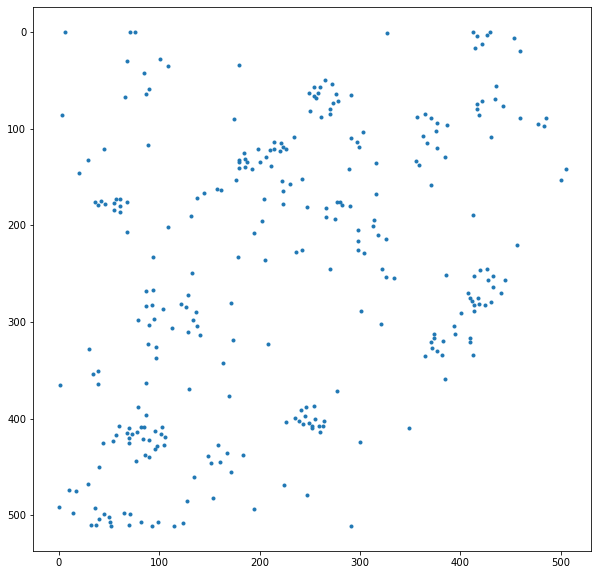

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(data_tdT.x, data_tdT.y, marker='.')
plt.gca().invert_yaxis()

In [6]:
## Check the optimum number of clusters

def elbow(data, n=int): 
    wcss = [] 
    for number_of_clusters in range(1, n): 
        kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
        kmeans.fit(data) 
        wcss.append(kmeans.inertia_)
    wcss
    ks = range(1, n)
    plt.plot(ks, wcss)

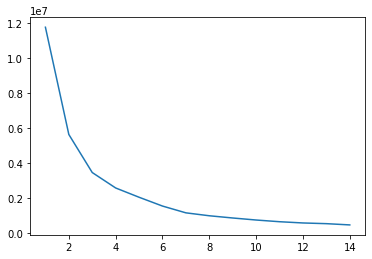

In [7]:
elbow(data_tdT, 15)

In [8]:
## K-Means clustering 

def kmeans(data, n=int):
    n_clusters = n
    kmeans = KMeans(init='random', n_clusters=n_clusters, random_state=42)
    identified_clusters = kmeans.fit_predict(data) # labels
    centroids = kmeans.cluster_centers_ # centroids
    mem_count = Counter(identified_clusters) # counting how much puncta are categorized to each label

    return identified_clusters, centroids, mem_count

In [9]:
result_tdT = kmeans(data_tdT, 15)
    # result[0] -> identified clusters (i.e., labels)
    # result[1] -> centroids
    # result[2] -> counter

In [10]:
## Visualization of K-Means clustering

def plotkmeans(data, result):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, c=result[0], cmap='rainbow', marker='.')
    plt.scatter(result[1][:,1], result[1][:,0], c='red', marker='P', s=200, alpha=0.7)
    plt.xlim(0, 520)
    plt.ylim(0, 520)
    plt.gca().invert_yaxis()
    plt.show()

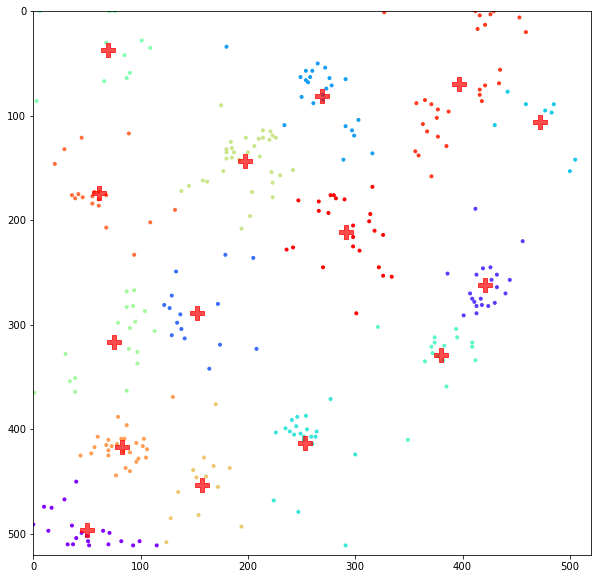

In [11]:
plotkmeans(data_tdT, result_tdT)

## APPROACH 1 

In [12]:
## Euclidean distance between the Centroids of the Clustered Puncta & the Centroids of the Identified Cells 
def get_cc_distances(cell_c, cluster_c): 
    '''
    cell_c = cell centroids
    cluster_c = centroids of clusters in which clusters represent the group of rna signals
    '''
    ds = []
    for i in range(len(cell_c)):
        for j in range(len(cluster_c)):
            cal = distance.euclidean(cell_c[i], cluster_c[j])
            ds.append(cal)

    return ds

## Sanity check
# len(ds) = len(cell_c)*len(cluster_c)

## Identifying positive cells based on the distances 
def get_pos_cells(distances, x=int):
    '''
    Extracting cells that are positive iff distance value with respect to each cluster is smaller than x
    '''
    positive_cells = [d for d in distances if d < x]
    return len(positive_cells) #, positive_cells

In [13]:
props_df = pd.read_csv('props_df.csv', index_col=0)
props_df = props_df.drop(0)
props_df['label'] = props_df['label'] - 10
props_df.rename(columns={'centroid-0':'centroid_y', 'centroid-1':'centroid_x'}, inplace=True)

centroids_cell = props_df[['centroid_y', 'centroid_x']]
centroids_cell = centroids_cell.to_numpy()

centroids_cluster = result_tdT[1]

In [14]:
props_df

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid_y,centroid_x,area,equivalent_diameter,mean_intensity,solidity,orientation,perimeter
1,1,1,76,29,101,14.803883,87.565049,515,25.606998,248.563107,0.932971,0.606827,93.254834
2,2,1,150,35,182,18.214286,165.265808,854,32.974939,252.611241,0.957399,-0.604220,112.740115
3,3,1,343,35,373,17.375773,358.006180,809,32.094404,252.163164,0.948417,0.011821,112.325902
4,4,1,439,22,459,10.443686,448.027304,293,19.314740,252.389078,0.954397,-0.671276,64.526912
5,5,1,45,29,78,13.753501,62.903361,714,30.151170,235.722689,0.899244,0.738273,115.840620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,74,471,382,496,409,483.576699,395.601942,515,25.606998,254.504854,0.951941,1.362742,86.183766
75,75,485,278,511,302,496.389728,288.984894,331,20.529060,208.006042,0.791866,0.426338,83.390873
76,76,484,429,502,452,493.020548,438.904110,292,19.281752,251.506849,0.856305,1.275497,77.012193
77,77,493,268,511,288,502.920319,276.868526,251,17.876888,252.968127,0.958015,0.829274,61.698485


In [15]:
distances = get_cc_distances(centroids_cell, centroids_cluster)
get_pos_cells(distances, 40)

29

In [68]:
distances = get_cc_distances(centroids_cell, centroids_cluster)

pos=[]
for i in range(40,51):
    val = get_pos_cells(distances, i)
    pos.append(val)

print('values:', pos, 'mean of all values:', statistics.mean(pos))

values: [29, 29, 29, 30, 30, 32, 32, 33, 33, 33, 35] mean of all values: 31.363636363636363


In [19]:
def plot_holistic_posregion(rna_data, kmeans_result, cell_data, pos_distance=int):
    ''' 
    rna_data = raw coordinates data of rna
    kmeans_result = centroids of the rna clusters (from the unsupervised kmeans clustering result defined above)
    cell_data = centroids of the cell (extracted from the props_df file)
    pos_distance = the distance criteria to discern whether the cells would be categeorized as pos/neg 
        (the distance between the centroids of the rna clusters vs. centroids of the cell)
    '''
    plt.figure(figsize=(10, 10))
    plt.scatter(rna_data.x, rna_data.y, c=kmeans_result[0], cmap='rainbow', marker='.')
    plt.scatter(kmeans_result[1][:,1], kmeans_result[1][:,0], c='red', marker='P', s=200, alpha=0.7)
    plt.scatter(cell_data[:,1], cell_data[:,0], c='black', s=100, alpha=0.5)
    plt.gca().invert_yaxis()

    ax = plt.gca()
    circles = []
    for i in range(len(kmeans_result[1])):
        circles.append(plt.Circle((kmeans_result[1][i,1], kmeans_result[1][i,0]), radius=pos_distance, color='k', fill=False))
        ax.add_patch(circles[i])

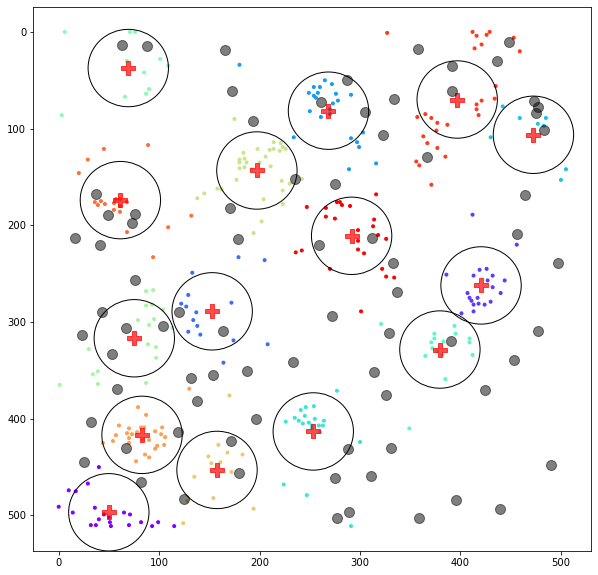

In [152]:
plot_holistic_posregion(data_tdT, result_tdT, centroids_cell, 40)

In [23]:
## Euclidean distance between the Centroids of the Cells
def get_cell_distances(cell_c):
    '''
    cell_c = cell centroids
    '''
    _cell_pair = []
    _cell_ds = []
    for i in range(len(cell_c)):
        for j in range(len(cell_c)):
            cal = distance.euclidean(cell_c[i], cell_c[j])
            _cell_pair.append([i+1, j+1])
            _cell_ds.append(cal)

    result = {'cell_pair':_cell_pair, 'cell_ds': _cell_ds}
    df = pd.DataFrame(result)
    df.drop(df[df['cell_ds'] == 0].index, inplace=True)
    
    return df

In [24]:
df = get_cell_distances(centroids_cell)
df.loc[df['cell_ds']<=20]

,cell_pair,cell_ds
1028,"[14, 15]",6.846564
1030,"[14, 17]",12.553007
1105,"[15, 14]",6.846564
1108,"[15, 17]",6.692803
1261,"[17, 14]",12.553007
1262,"[17, 15]",6.692803
1265,"[17, 18]",18.302223
1342,"[18, 17]",18.302223
2055,"[27, 28]",10.771660
2132,"[28, 27]",10.771660


In [25]:
def pinpoint_cell(rna_data, kmeans_result, cell_data, pos_distance=int, label_1=int, label_2=int):
    ''' 
    rna_data = raw coordinates data of rna (in csv format)
    kmeans_result = centroids of the rna clusters (from the unsupervised kmeans clustering result defined above)
    cell_data = centroids of the cell (extracted from the props_df file)
    pos_distance = the distance criteria to discern whether the cells would be categeorized as pos/neg 
        (the distance between the centroids of the rna clusters vs. centroids of the cell)
    label_1, label_2 = labels of the cell that we want to pinpoint 
    '''
    plt.figure(figsize=(10, 10))
    plt.scatter(rna_data.x, rna_data.y, c=kmeans_result[0], cmap='rainbow', marker='.')
    plt.scatter(kmeans_result[1][:,1], kmeans_result[1][:,0], c='red', marker='P', s=200, alpha=0.7)
    plt.scatter(cell_data[:,1], cell_data[:,0], c='black', s=100, alpha=0.5)
    plt.scatter(cell_data[label_1-1,1], cell_data[label_1-1,0], c='#FF00B9', marker='D', s=250, alpha=0.8)
    plt.scatter(cell_data[label_2-1,1], cell_data[label_2-1,0], c='#FFA600', marker='D', s=250, alpha=0.8)
    plt.gca().invert_yaxis()

    ax = plt.gca()
    circles = []
    for i in range(len(kmeans_result[1])):
        circles.append(plt.Circle((kmeans_result[1][i,1], kmeans_result[1][i,0]), radius=pos_distance, color='k', fill=False))
        ax.add_patch(circles[i])

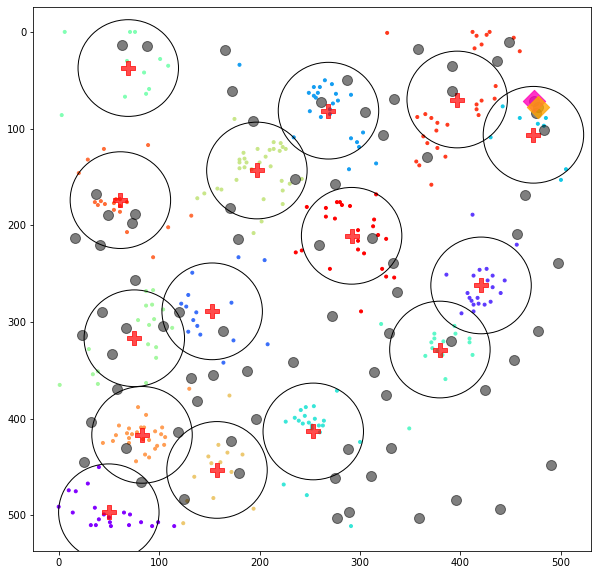

In [26]:
pinpoint_cell(data_tdT, result_tdT, centroids_cell, 50, 14, 15)

## APPROACH 2

In [16]:
## Euclidean distance between the each puncta & the Centroids of the Identified Cells 
def get_cs_distance(cell_c, rna_data): 
    '''
    cell_c = cell centroids
    rna_data = raw coordinates data of rna (in 2d array format)
    '''
    ds = np.empty((0, 2), int)
    for i in range(len(cell_c)):
        for j in range(len(rna_data)):
            cal = distance.euclidean(cell_c[i], rna_data[j])
            ds = np.append(ds, np.array([[i+1, cal]]), axis=0)

    return ds

In [17]:
def viz_cell_dilate(rna_data, cell_data, dilation_radius=int):
    ''' 
    rna_data = raw coordinates data of rna (in dataframe)
    cell_data = centroids of the cell (extracted from the props_df file)
    dilation_radius = how much pixel from the cell centroids you want the consider as a cell (i.e., cell boundary)
    '''
    plt.figure(figsize=(10, 10))
    plt.scatter(rna_data.x, rna_data.y, marker='.')
    plt.scatter(cell_data[:,1], cell_data[:,0], c='red', s=100, alpha=0.5)
    plt.gca().invert_yaxis()

    ax = plt.gca()
    circles = []
    for i in range(len(cell_data)):
        circles.append(plt.Circle((cell_data[i,1], cell_data[i,0]), radius=dilation_radius, color='k', ls='--', fill=False))
        ax.add_patch(circles[i])

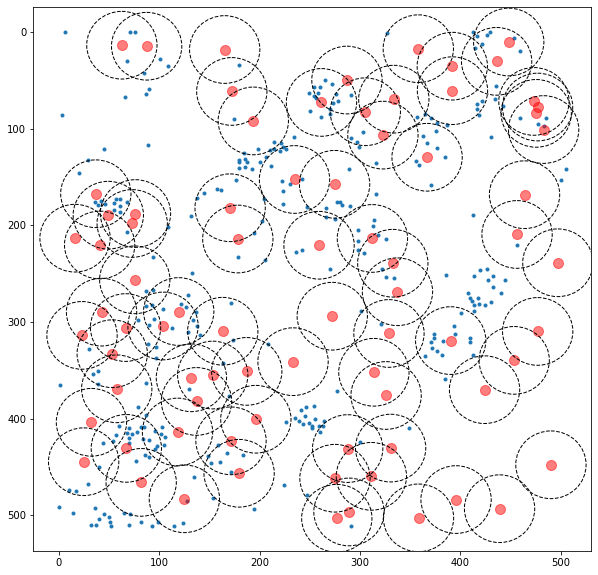

In [18]:
viz_cell_dilate(data_tdT, centroids_cell, 35)

In [19]:
def get_filtered_ds(cell_c, rna_data, x=int):
    ''' 
    cell_c = centroids of the cell
    rna_data = raw coordinates data of the rna (in 2d array)
    x = how much distance(in pixel) from the cell centroids you want to consider as a signal
        (i.e., x selects the puncta to be considered for each cell)
    '''
    all_ds = get_cs_distance(cell_c, rna_data)
    pd.DataFrame(all_ds).to_csv('all_ds.csv')
    all_ds = pd.read_csv('all_ds.csv', index_col = 0)
    all_ds.rename(columns={'0':'cell_label', '1':'puncta_ds'}, inplace=True)
    all_ds['cell_label'] = all_ds['cell_label'].astype(int)

    all_ds_filtered = all_ds[all_ds['puncta_ds'] <= x]
    all_ds_filtered.to_csv('all_ds_filtered.csv')
    return all_ds_filtered

In [20]:
def get_pos_cells(filtered_ds, rna_data, x=int):
    ''' 
    filtered_ds = dataframe generated by the 'get_filtered_ds' function
    rna_data = raw coordintates data of the rna (in 2d array)
    x = criteria for "how much puncta are required to categorize cell as pos?" 
    '''
    filtered_cells = filtered_ds['cell_label'].T.to_numpy()
    counter_filtered_cells = dict(Counter(filtered_cells))

    pos_cells = []
    for key, value in counter_filtered_cells.items():
        if value >= x:
            pos_cells.append(key)
    
    return pos_cells, len(pos_cells)

In [21]:
data_tdT_txt = np.loadtxt('spots_tdT_2d.txt')
all_ds_filtered = get_filtered_ds(centroids_cell, data_tdT_txt, 40) # Consider puncta which are within the distance of 40 pixel from the cell centroid 
pos_cells = get_pos_cells(all_ds_filtered, data_tdT_txt, 10) # If over 10 puncta, categorize as 10. 
pos_cells

([6, 8, 12, 13, 16, 20, 21, 22, 23, 26, 27, 28, 40, 43, 48, 62, 64], 17)

In [48]:
data_tdT_txt = np.loadtxt('spots_tdT_2d.txt')

ds = []
pos = []
for i in range(35, 46):
    all_ds_filtered = get_filtered_ds(centroids_cell, data_tdT_txt, i) 
    ds.append(all_ds_filtered)
    pos_cells = get_pos_cells(all_ds_filtered, data_tdT_txt, 10) # If over 10 puncta, categorize as 10. 
    pos.append(pos_cells[1])

print('pos_values:', pos, 'mean:', statistics.mean(pos))

pos_values: [8, 11, 14, 14, 15, 17, 18, 20, 21, 23, 25] mean: 16.90909090909091
